<a href="https://colab.research.google.com/github/broisdead/autoencoder-/blob/main/file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Flatten, Dense, Reshape
from tensorflow.keras.optimizers import Adam










In [ ]:
# Config
BATCH_SIZE = 128
EPOCHS = 15
LATENT_DIM = 64
NOISE_STD = 0.5
IMG_SHAPE = (28,28,1)

In [ ]:
# Load & preprocess
(x_train, _), (x_test, _) = mnist.load_data()
x_train = np.expand_dims(x_train.astype("float32")/255., -1)
x_test  = np.expand_dims(x_test.astype("float32")/255., -1)
rng = np.random.RandomState(1234)
x_train_noisy = np.clip(x_train + rng.normal(0, NOISE_STD, x_train.shape), 0, 1)
x_test_noisy  = np.clip(x_test  + rng.normal(0, NOISE_STD, x_test.shape), 0, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Autoencoder
inp = Input(shape=IMG_SHAPE)
x = Conv2D(32,3,strides=2,padding="same",activation="relu")(inp)
x = Conv2D(64,3,strides=2,padding="same",activation="relu")(x)
x = Flatten()(x)
x = Dense(LATENT_DIM, activation="relu")(x)
x = Dense(7*7*64, activation="relu")(x)
x = Reshape((7,7,64))(x)
x = Conv2DTranspose(64,3,strides=2,padding="same",activation="relu")(x)
x = Conv2DTranspose(32,3,strides=2,padding="same",activation="relu")(x)
out = Conv2D(1,3,padding="same",activation="sigmoid")(x)
autoencoder = Model(inp,out)
autoencoder.compile(optimizer=Adam(1e-3), loss="mse")

In [ ]:

# Train
autoencoder.fit(x_train_noisy,x_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, verbose=1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 71s 163ms/step - loss: 0.0852 - val_loss: 0.0230
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 70s 166ms/step - loss: 0.0203 - val_loss: 0.0155
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 164ms/step - loss: 0.0148 - val_loss: 0.0135
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 70s 165ms/step - loss: 0.0132 - val_loss: 0.0128
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 169ms/step - loss: 0.0123 - val_loss: 0.0123
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 70s 165ms/step - loss: 0.0118 - val_loss: 0.0120
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 70s 167ms/step - loss: 0.0114 - val_loss: 0.0118
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 85s 173ms/step - loss: 0.0110 - val_loss: 0.0115
Epoch 9/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 79s 166ms/step - loss: 0.0107 - val_loss: 0.0115
Epoch 10/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 168ms/step - loss: 0.0106 - val_loss: 0.0112
Epoch 11/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 170ms/step - loss: 0.0104 - val_loss: 0.0113
Epoch 12/15
422/422

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


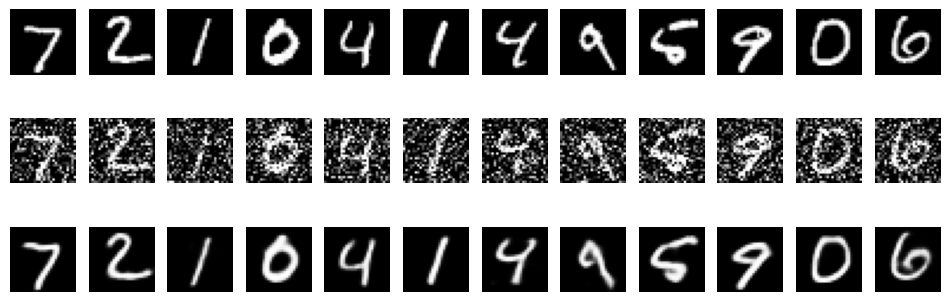

In [ ]:
# Evaluate & visualize
recon = autoencoder.predict(x_test_noisy[:12])
plt.figure(figsize=(12,4))
for i in range(12):
    plt.subplot(3,12,i+1); plt.imshow(x_test[i].squeeze(), cmap="gray"); plt.axis("off")
    plt.subplot(3,12,i+13); plt.imshow(x_test_noisy[i].squeeze(), cmap="gray"); plt.axis("off")
    plt.subplot(3,12,i+25); plt.imshow(recon[i].squeeze(), cmap="gray"); plt.axis("off")
plt.show()
